In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats

%matplotlib inline

#### 1. По данным опроса, 75% работников ресторанов утверждают, что испытывают на работе существенный стресс, оказывающий негативное влияние на их личную жизнь. Крупная ресторанная сеть опрашивает 100 своих работников, чтобы выяснить, отличается ли уровень стресса работников в их ресторанах от среднего. 67 из 100 работников отметили высокий уровень стресса. Посчитайте достигаемый уровень значимости, округлите ответ до четырёх знаков после десятичной точки.

* **выборка:** бинарный вектор длины $n$, где 1 — испытывают стресс, 0 — отсутствие стресса;
* **гипотеза $H_0$:** выборочное среднее равно заданному числу $x=\mu$;
* **статистика $T$:** количество единиц в выборке опрошенных.

In [2]:
n = 100
F_H0 = stats.binom(n, 0.75)

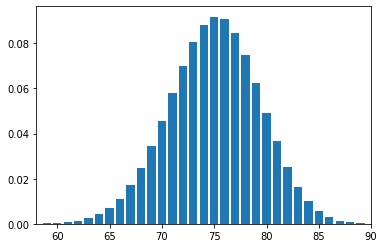

In [3]:
x = np.linspace(0, 100, 101)

plt.bar(x, F_H0.pmf(x), align = 'center')
plt.xlim(58, 90) 
plt.show()

**Двусторонняя альтернатива:<br> 
гипотеза $H_1$:** выборочное среднее не равно заданному числу $x\neq\mu$;

При такой альтернативе более вероятны очень большие и очень маленькие значения статистики; при расчёте достигаемого уровня значимости будем суммировать высоту столбиков в правом и левом хвостах распределения.

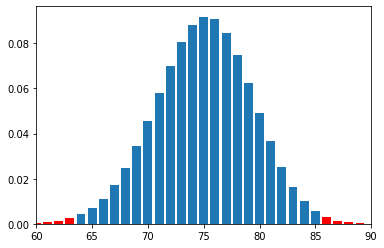

In [4]:
plt.bar(x, F_H0.pmf(x), align = 'center')
plt.bar(np.linspace(86,90,5), F_H0.pmf(np.linspace(86,90,5)), align = 'center', color='red')
plt.bar(np.linspace(59,63,5), F_H0.pmf(np.linspace(59,63,5)), align = 'center', color='red')
plt.xlim(60, 90) 
plt.show()

In [5]:
print(f"p-value: {stats.binom_test(67, n=100, p=0.75, alternative='two-sided')}")

p-value: 0.08222258891386608


Мы не можем отвергнуть нулевую гипотезу о том, что уровень стресса работников в их ресторанах отличается от среднего при уровне значимости 0.05

#### 2. Представим теперь, что в другой ресторанной сети только 22 из 50 работников испытывают существенный стресс. Гипотеза о том, что 22/50 соответствует 75% по всей популяции, методом, который вы использовали в предыдущей задаче, отвергается. Чем это может объясняться? Выберите все возможные варианты.

In [6]:
print(f"p-value: {stats.binom_test(22, n=50, p=0.75, alternative='two-sided')}")

p-value: 3.4831478978300243e-06


#### 3. The Wage Tract — заповедник в округе Тома, Джорджия, США, деревья в котором не затронуты деятельностью человека со времён первых поселенцев. Для участка заповедника размером 200х200 м имеется информация о координатах сосен (sn — координата в направлении север-юг, we — в направлении запад-восток, обе от 0 до 200).

In [7]:
pines = pd.read_csv('pines.txt', sep='\t', header=0)
pines.head()

,sn,we
0,200.0,8.8
1,199.3,10.0
2,193.6,22.4
3,167.7,35.6
4,183.9,45.4


Проверим, можно ли пространственное распределение сосен считать равномерным, или они растут кластерами.

Загрузите данные, поделите участок на 5х5 одинаковых квадратов размера 40x40 м, посчитайте количество сосен в каждом квадрате (чтобы получить такой же результат, как у нас, используйте функцию scipy.stats.binned_statistic_2d).

Если сосны действительно растут равномерно, какое среднее ожидаемое количество сосен в каждом квадрате? В правильном ответе два знака после десятичной точки.

In [8]:
bins = stats.binned_statistic_2d(x=pines.sn, y=pines.we, values=None, statistic='count', bins=[5, 5])
np.mean(bins.statistic)

23.36

#### 4. Чтобы сравнить распределение сосен с равномерным, посчитайте значение статистики хи-квадрат для полученных 5х5 квадратов. Округлите ответ до двух знаков после десятичной точки.

In [9]:
observed_frequences = bins.statistic.flatten()
expected_frequences = np.array([np.mean(observed_frequences) for i in range(len(observed_frequences))])

stats.chisquare(observed_frequences, expected_frequences, ddof=0)

Power_divergenceResult(statistic=150.58904109589042, pvalue=2.574669774967279e-20)